# Programming for Data Science 2022
## Homework Assigment Three

Homework Assigment Three focus in the step-by-step implementation of a simple, yet popular, clustering algorithm, the K-Means. Although in most projects you will source algorithms from readily available in implementations found in libraries such as scikit-learn or Keras, in some cases you will need to implement an algorithm yourself. For instance, if such algorithm is not available or if you want to implement a problem-specific modification. In that sense, learning to implement algorithms is an important part of your skillset.

Your submission will be graded according to the following guidelines:
1. **Execution** (does your program does what is asked from the exercise?
2. **Objectivity** (are you using the adequate libraries? are you using a library ... )
3. **Readibility** of your code (that includes comments, naming of variables, supporting text, etc ...)

In some questions might require that you make critical decisions, or design choices. In such cases, you will be graded according to your ability to justify and support your decisions.

<b>Comment your code properly, which includes naming your variables in a meaningful manner. Badly documented code will be penalized.</b>

This assignment is to be done in pairs, as in the first one, but remember that **you can't have the same pair as you had in Homeworks 1 and 2**. 

**Students that are caught cheating will obtain a score of 0 points.** <br>

The Homework 3 is worth 30% of your final grade.    

The submission package should correspond to a .zip archive (.rar files are not accepted) with the following files:
1. Jupyter Notebook with the output of all the cells;
2. PDF/HTML print of your Jupyter Notebook (in jupyter go to File -> Download as -> HTML/PDF);
3. All text or .csv files exported as part of the exercises. Do not upload the files downloaded/imported as part of the exercises.

**Please change the name of the notebook to "H2.\<student_1_id\>_\<student_2_id\>.ipynb", replacing \<student_id\> by your student_id.** <br>

Submission is done through the respective Moodle activity and only one of the group members has to submit the files. <br>
Deadline is the 30th of October at 23:59. <br>
A penality of 1 point per day late will be applied to late deliveries. <br>
**In this notebook you are allowed to use Pandas and Numpy.**

## Group Registration

Edit this cell with the information of the authors of this submission.

|      |     Student Name     |     Student ID     | 
|---   |         ---          |           ---          |
| 1    |      Carolina Mira      |       20220553         | 
| 2    |       Rita Silva        |       20220544         | 

## Clustering with K-Means

K-means is one of the simplest clustering algorithms, which you perhaps are already familiar from Data Mining. The K-means Algorithm consists in writing a program that proceeds as follows:

1. Choose value for K (number of clusters);
2. Initialize the locations of the centroids, which we can do by randomly select K points from your dataset as initial locations of the centroids;
3. Calculate distance of all other points to each of the K centroids;
4. Associate each point to the cluster of the closest centroid;
5. Update the centroid position, by computing the average coordinates of all points associated to each cluster;
6. Evaluate the average change in the centroids positions, as a measure of convergence (the algorithm is said to have converged to the solution when the positions of the centroids don't change more than a given tolerance threshold);
7. Repeat steps 3-6 until either the centroids no longer move more than a tolerance threshold or until you repeated these steps at least for specified number of iterations (niter)

The algorithm is thus parametized by the number of clusters (K), the maximum number of iterations (niter), and the tolerance threshold (tol).

### Step 1

Let us start by importing the necessary libraries to execute this homework. <br>
Import **numpy, Scipy, and pandas** using, respectively, the **aliases np, sc, and pd**.

<span style="color:red">**These are the only libraries you are allowed to use in the remaining of the steps, unless explicitly said the opposite/if the library is imported in the cells below.**</span>

In [1]:
import numpy as np
import scipy as sc
import pandas as pd

It is important that we devise a strategy to test our code at each step, in order to assess if it performs as expected. To that end, we have split each step of the algorithm in different blocks, and we ask you to test each block against a simple scenario where the outcome is predictable and can be computed by hand. In some steps, however, we want to pass a more comprehensive data set with similar properties to the real dataset we will be working with.<br>

Such test datasets try to create realistic conditions in which your algorithm is expected to work correctly, and for which we can also assess if the solution matches our expectation and have a general understanding if the algorithm performs as expected in "real-world" conditions.<br>

For this homework we will resort to a dataset that contains two clearly distinct clusters. We generated the clusters by sampling points from two distinct gaussian distributions with different averages and same standard deviation. <br>

As such, our algorithm should be able to identify each cluster easily, and place the centroids close to the averages of the two distributions. <br>

Run the cell below to download, load the data into a numpy array, and visualize your Test dataset.<br>
You will run your algorithm implementation against this dataset as a proof of work.

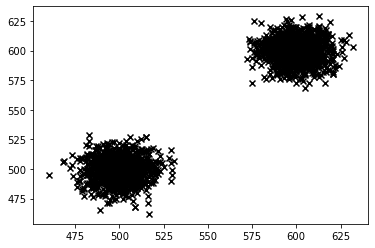

In [2]:
import matplotlib.pyplot as plt

# download the file into a dataframes and convert it to a numpy array.
data_test = pd.read_csv("https://www.dropbox.com/s/gax1l68jsarxqt9/data_test.txt?dl=1", header=None).to_numpy()

#plot the points into a scatter plot
plt.scatter(data_test[:, 0], data_test[:,1], color ='k', marker='x')

### Step 2 

Write a function named <b>init</b> that takes two arguments: $points$ and $K$. <br>
The function <b>init</b> should return a numpy ndarray with  $K$ elements sampled randomly and without replacement from $points$. Meaning, the same point should not be picked up twice. <br>

**Show that your function performs as desired by calling it with** $K = 2$ **and on the data_test as the** $points$.

In [3]:
def init(points, K):
    
    # Creating a np array with number of points equal to a given K, selecting randomly the values. We use replace = False
    # so that the values don't appear repeated.
    array = points[np.random.choice(points.shape[0], K, replace=False)]
    return array

In [4]:
init(data_test,2)

array([[500, 496],
       [494, 506]], dtype=int64)

### Step 3

Write a function named <b>distance</b> that takes two arguments: $p1$ and $p2$. <br>
The function <b>distance</b> should return a scalar that corresponds to the euclidian distance between points $p1$ and $p2$, that should have a ndarray format. <br> 
For the assignment you can assume that $p1$ and $p2$ are two-dimensional ndarrays points. But in general, you should assume that p1 and p2 are two ndarrays of the same size.

Recall that the euclidian distance (d) between two points ($p_1$ and $p_2$) in a 2-dimensional space is given by:<br><br>
\begin{equation}
    d(p_1, p_2) = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}
\end{equation}<br>
where $p_1 = \{x_1,y_1\}$ and  $p_2 = \{x_2,y_2\}$. 

**Test your function works by computing the distance between p1=(1,3) and p2=(7,2), which is $\approx$ 6.08.**<br>
**Consider using the existing Numpy or Scipy packages for this task**

Can you write a function that computes the euclidian distance between two points of arbitrary dimension? <br>
In general, for arbitrary dimensionality the square of the distance can be computed as:<br><br>
\begin{equation}
    d^2(p_1, p_2) = \sum_{i=0}^{D-1} (x_i-y_i)^2
\end{equation}<br>
where $p_1 = \{x_1,x_2,...,x_{D-1}, x_D\}$ and $p_2 = \{y_1,y_2,...,y_{D-1},y_D\}$.<br>

**Show your function works by computing the distance between (1,3,-9,12) and (7,2,0,5)**

In [5]:
def distance(p1,p2):
    
    # Creating a variable using np.linalg.norm(), a function that calculates the euclidian distance between 2 points
    dist = np.linalg.norm(p1-p2)
    return dist

In [6]:
# Test variables do not change
p1 = np.array([1,3])
p2 = np.array([7,2])

In [7]:
print(f'The euclidian distance between the points {p1} and {p2} is {round(distance(p1,p2),2)}.')

The euclidian distance between the points [1 3] and [7 2] is 6.08.


In [8]:
p3 = np.array([1,3,-9,12])
p4 = np.array([7,2,0,5])

In [9]:
print(f'The euclidian distance between the points {p3} and {p4} is {round(distance(p3,p4),2)}.')

The euclidian distance between the points [ 1  3 -9 12] and [7 2 0 5] is 12.92.


### Step 4

Write a function named <b>centroid</b> that takes one argument: $points$.<br>

The argument $points$ should be a ndarray with the coordinates of a set of observations.<br>

The function <b>centroid</b> should return an ndarray with $d$ values (being $d$ the number of dimensions)</span>, the $n^{th}$ index of the returned output ndarray should thus correspond to the averaged of the values in the $n^{th}$ column of the points ndarray. In other words, correspond to the average position along a specific dimension of observations in $points$.</span>

**Test your function and check that is works by using the ndarray TEST**


In [10]:
def centroid(points):
    
    # Creating a variable using np.mean(), a function that calculates the average of each column and returns all values
    # in a np array
    cent = np.mean(points, axis=0)
    return cent

In [11]:
#Test variables do not change the values
TEST = np.array([[1,2,3,4,5],[0,0,1,1,1],[0,1,2,4,5]])
print(TEST)

[[1 2 3 4 5]
 [0 0 1 1 1]
 [0 1 2 4 5]]


In [12]:
centroid(TEST)

array([0.33333333, 1.        , 2.        , 3.        , 3.66666667])

### Step 5

Write a function <b>cupdate</b> that takes two input arguments: <i>points</i> and <i>clusters</i><br> 

The argument <i>points</i> is a ndarray containing the coordinates of a set of points (1 point per row).<br>

The argument <i>clusters</i> is a 1-dimensional ndarray that indicates the cluster to which each point is associated.<br>

Note that values in <i>clusters</i> are integers and can only take values between 0 and K-1, where K is the total number of clusters.

The function <b>cupdate</b> should return an ndarray with the average coordinates of the points associated to each cluster, that is the centroid of each cluster. The returned array should have the same number of columns as points (dimensions) and length K (rows).

**Test your function and report the centroids generated by passing p and c as inputs with k = 3. Save these centroids as a variable: cen**

In [13]:
def cupdate(points, clusters):
    
    # Creating a variable K, equal to the total number of clusters, using np.unique(), a function that creates a new 
    # array with non repeated values from a given array (example: len([0,1,2]) = 3)
    K = len(np.unique(clusters))
    
    # Creating a list to store values of the centroids
    centroids = []
    
    # Iterating K clusters and calculating the mean of all group of points that belong to the same cluster
    for i in range(K):
        
        # Storing all of the average values in the list centroids
        centroids.append(np.mean(points[clusters == i], axis = 0))
    
    # Changing object list to np array
    return np.array(centroids)


In [14]:
# Test variables, do not change the values
p = np.array([[0.8922063, 0.26672425],[0.34475611, 0.35976697],[0.33253499, 0.18923898],[0.66872466, 0.46248986],[0.72823733, 0.10537784],[0.40903598, 0.70639412],[0.79926596, 0.90095583],[0.67886544, 0.84573289],[0.3641813, 0.64296743],[0.07461196, 0.74290527]])
c = np.array([2, 0, 0, 1, 1, 0, 0, 1, 0, 1])

print(p)
print(c)


[[0.8922063  0.26672425]
 [0.34475611 0.35976697]
 [0.33253499 0.18923898]
 [0.66872466 0.46248986]
 [0.72823733 0.10537784]
 [0.40903598 0.70639412]
 [0.79926596 0.90095583]
 [0.67886544 0.84573289]
 [0.3641813  0.64296743]
 [0.07461196 0.74290527]]
[2 0 0 1 1 0 0 1 0 1]


In [15]:
cen = cupdate(p,c)
cen

array([[0.44995487, 0.55986467],
       [0.53760985, 0.53912646],
       [0.8922063 , 0.26672425]])

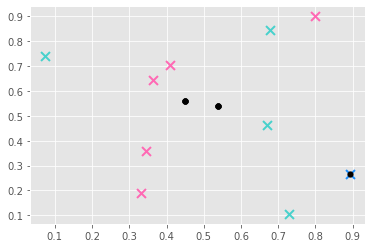

In [16]:
# Data visualization, applying the previous function
from matplotlib import style

style.use('ggplot')
colors = ["hotpink","mediumturquoise","dodgerblue"]

p = np.array([[0.8922063, 0.26672425],[0.34475611, 0.35976697],[0.33253499, 0.18923898],[0.66872466, 0.46248986],[0.72823733, 0.10537784],[0.40903598, 0.70639412],[0.79926596, 0.90095583],[0.67886544, 0.84573289],[0.3641813, 0.64296743],[0.07461196, 0.74290527]])
c = np.array([2,0,0,1,1,0,0,1,0,1])
centroids = cen

for i in range(len(c)):
    plt.scatter(p[i,0],p[i,1], marker="x", color=colors[c[i]], s=80, linewidths=2)
    
for centroid in centroids:
    plt.scatter(centroids[:2,0],centroids[:2,1], marker="o", color="k", linewidths=0.2)

plt.scatter(centroids[2,0],centroids[2,1], marker="o", color="k", linewidths=0.2)

plt.show()

### Step 6

Write a function <b>pupdate</b> that takes two input arguments: $points$ and $centroids$.<br>

The function <b>pupdate</b> should return a one-dimensiona ndarray that indicates the index of the centroid that is closer to each point. To determine the distance between a centroid and a point you can use your distance function you created earlier. <br>

You will need to assess the distance between each point to each centroid. Different approaches can be taken to do this. For instance, you can start by computing a d by k distance matrix matrix between each of the $d$ points and the $k$ centroids.

**Test your function by calling it and passing the array p (as defined above) with the output of cupdate, cen, as arguments. You should get an output that looks like c defined above (but is not exactly the same, can you see why). Print this result and save it in a variable called new_clusters**

In [17]:
def pupdate(points, centroids):
    
    # Creating an empty np array with number of rows equal to the length of points and number of columns equal to 
    # the length of centroids.
    dists = np.empty((len(points),len(centroids)))
    
    # Iterating points and centroids arrays and applying the previous function distance to calculate the distance between 
    # each point and each centroid.
    for i in range(len(points)):
        for j in range(len(centroids)):  
            
            # Storing the distance in the array dists
            dists[i,j] = distance(points[i], centroids[j])
    
    # Find the minimum values of dists and update for the new centroids, returning their locations based on clusters
    return np.argmin(dists, axis = 1)
        

In [18]:
new_clusters = pupdate(p,cen)
new_clusters

array([2, 0, 0, 1, 2, 0, 1, 1, 0, 0], dtype=int64)

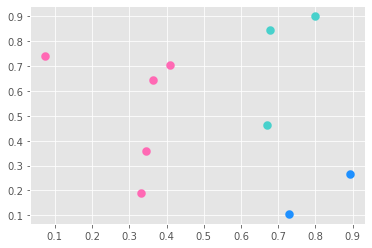

In [19]:
# Data visualization, applying the previous function
style.use('ggplot')
colors = ["hotpink","mediumturquoise","dodgerblue"]

p = np.array([[0.8922063, 0.26672425],[0.34475611, 0.35976697],[0.33253499, 0.18923898],[0.66872466, 0.46248986],[0.72823733, 0.10537784],[0.40903598, 0.70639412],[0.79926596, 0.90095583],[0.67886544, 0.84573289],[0.3641813, 0.64296743],[0.07461196, 0.74290527]])
c = new_clusters

for i in range(len(c)):
    plt.scatter(p[i,0],p[i,1], marker=".", color=colors[c[i]], s=80, linewidths=4)

plt.show()

### Step 7

Write a function <b>error</b> that takes two input arguments: oldcentroids and newcentroids.<br>

The argument oldcentroids corresponds to a ndarray with centroid positions from the previous iteration, and newcentroids to a ndarray with the newly computed centroid positions from the current iteration. <br>

The function <b>error</b> should return the average euclidian distance (the square error) between the old and new positions of each centroid.  This will give us a quantity that tell us whether our algorithm is still converging to the solution or  got to good approximation.</span> We will use the function error to obtain an estimate of whether the algorithm is still converging to the solution (that is the centroids are, in average, moving a lot) or if we entered a scenario of small steps (that is the centroids are, in average, not moving that much). 

We will use this information combined with a **tolerance threshold** in regards to the average change in the centroids positions to decide if it is a good time to stop the algorithm. You should make this decision.


**Test your function then report the distance between the centroids calculated in Step 5, cen, and the centroids that you can calculate using the function cupdate with the arguments points and new_clusters.**

In [20]:
def error(oldcentroids, newcentroids):
    
    # Creating a list to store values of the distances
    avg_dist = []
    
    # Iterating oldcentroids and newcentroides arrays and apply the distance function to calculate the distance between 
    # old and new centroids
    for i in range(len(oldcentroids)):
        for j in range(len(newcentroids)):
            if(i == j):
                avg_dist.append(distance(oldcentroids[i], newcentroids[j]))

    # Calculate the average of distances to understand if our algorithm is still converging to the solution or to a 
    # good approximation
    return sum(avg_dist)/len(avg_dist)

# Define newcentroids with cupdate fuction
newcentroids = cupdate(p,new_clusters)
    

In [21]:
error(cen,newcentroids)

0.17635560837965428

### Step 8

Write a wrapper function called <b>kmeans</b> that takes the following arguments:
- $points$, which is a ndarray of points;
- $K$, the number of clusters, set the default value to two;
- $niter$, the number of iterations;
- $tol$, the error tolerance threshold below which your algorithm should stop

The function should return:
- A one dimensional ndarray with the cluster of associated to each point,
- A ndarray with the location of the K centroids.

Use the functions you prepared in the previous to assemble the function <b>kmeans</b>. <br>
Use the tolerance as a treshold to stop the algorithm, for instance by evaluating if the average variation in the distance between the new and previous coordinates of the centroids is below the tolerance level. If yes, then you can stop the algorithm and return the outputs. <br>

**You will need to make some decisions about the best approach to select the correct range of values to pass to init(). Explain how you did it.**

**Note: A common issue with the K-means algorithm is that in some limiting conditions it might lead to empty clusters. In that case it is expected that your algorithm to return errors. Although that is not expected to happen with the examples provided, you might want to consider implementing some heuristics to overcome those errors. However, such is an optional task, and for this homework if you bump into such errors we recommend you try to rerun your code.**

In [22]:
def kmeans(points,K,niter,tol):
    
    # Using the init function to select randomly the k initial centroids
    old_centroids = init(points,K)
    
    # Iterating niter, a given number of iterations
    for i in range(niter):
         
        # Using the function pupdate to calculate the indexes of each cluster
        indexes = pupdate(points,old_centroids)

        # Using the fuctions cupdate with points and indexes as arguments to calculate the centroid of each cluster
        new_centroids = cupdate(points,indexes)
          
        # Comparing the value of the error with the value of tol. If the error is lower than tol, the algorithm stops
        if(error(old_centroids,new_centroids) < tol):
            break
        
        # Update centroids, so that the old ones become the new centroids after each iteration
        old_centroids = new_centroids
      
    # Return indexes of the clusters associated to each point and the coordinates of new centroids
    return indexes, new_centroids

In [23]:
results = kmeans(data_test,2,500,0.00001)
results

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([[499.65527344, 498.94433594],
        [599.49853372, 599.63538612]]))

It is useful to visually inspect the results in order to assess the performance of the clustering algorthim. <br>
Below is an example of how you can visualize your results for a sample dataset. <br>
Can you adapt the code to show your results applied to data_test with K = 2, niter = 500, tol = 0.00001.

<span style="color:red">**In this step feel free to use any other visualization library such as Seaborn.**</span>

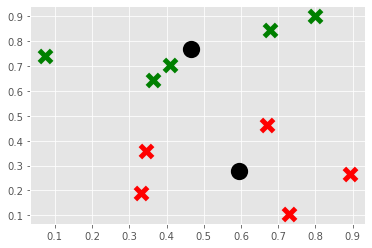

In [24]:
#boilerplate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# let us define the style of the plot here
style.use('ggplot')
colors = ["g","r","c","b"]

# sample data for this example
p = np.array([[0.8922063, 0.26672425],[0.34475611, 0.35976697],[0.33253499, 0.18923898],[0.66872466, 0.46248986],[0.72823733, 0.10537784],[0.40903598, 0.70639412],[0.79926596, 0.90095583],[0.67886544, 0.84573289],[0.3641813, 0.64296743],[0.07461196, 0.74290527]])
centroids = [np.array([0.46519213, 0.76779111]),np.array([0.59329188, 0.27671958])]
clusters = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

# plot each point in the centroids array
for centroid in centroids:
    plt.scatter(centroid[0],centroid[1], marker="o", color="k", s=150, linewidths=5)

# plot each point in the points array, colored according to the cluster they belong
for i in range(len(clusters)):
    plt.scatter(p[i,0],p[i,1], marker="x", color=colors[clusters[i]], s=150, linewidths=5)

# plot all elements
plt.show()

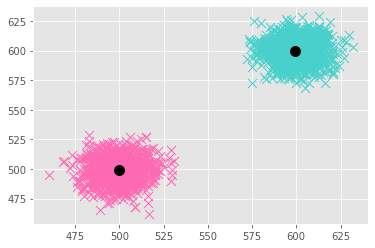

In [25]:
# let us define the style of the plot here
style.use('ggplot')
colors = ["hotpink","mediumturquoise"]

# Sample data for this example. kmeans function give us the centroids and clusters to use on this visualization
p = data_test
centroids = results[1]
clusters = results[0]

# plot each point in the points array, colored according to the cluster they belong
for i in range(len(clusters)):
    plt.scatter(p[i,0],p[i,1], marker="x", color=colors[clusters[i]], s=80, linewidths=1)

# plot each point in the centroids array
for centroid in centroids:
    plt.scatter(centroid[0],centroid[1], marker="o", color="k", s=80, linewidths=2)

# plot all elements
plt.show()

### Step 9

Write a function <b>inertia</b> that takes three input arguments: $points$, $clusters$, and $centroids$.<br>
Where $points$ is a 2-dimensional ndarray with the coordinates of each point in your dataset, clusters is a vector that indicates the cluster of each point (takes values between $0$ and $K-1$), and $centroids$ is a 2-dimensional ndarray with length $k$ of the coordinates of the centroids.

The function should return a tuple in which the first value is the number of clusters and the second is the computed **average squared Euclidean distance** of the points to the centroid of the cluster they are assigned.
The Squared of the Euclidean distance is a common measure of error that satisfies several important properties, namely it is strictly convex and smooth. It is often used in the method of Least Squares to fit linear functions to data, in which we try to find the parameters of a linear model that minimize the average of the square distances between the observed values and the values predicted by the fitted model. Here we are borrowing these concepts to measure the dispersion of points in a cluster, in other words, the error between the position of the centroid and the locations of the points associated with it.

**Test your function and report the results of using point=p, clusters=c, and centroids=cen. These are the variables that you have used in the previous steps**

<span style="color:red">**Note: distance always refers to the euclidean distance.**</span>

In [26]:
def inertia(points,clusters,centroids):
    
    # Define the number of clusters, that is the value of unique clusters
    number_clusters = np.unique(clusters)
    
    # Creating a list to store the distances between points and centroids
    dist = []
    
    # Iterating clusters and centroids
    for i in range(len(clusters)):
        for j in range(len(centroids)):  
            
            # Finding the position of a centroid from the respective cluster
            if (clusters[i] == j):
                
                # Calculate Squared Euclidean distance
                square_dist = (distance(points[i], centroids[j]))**2
                
                # Append the values into the dist list
                dist.append(square_dist)

    # Calculate the average of the values on the dist list
    avg_dist = sum(dist)/len(dist)

    # Return number of clusters and value of the average
    return(len(number_clusters),avg_dist)

In [27]:
p = np.array([[0.8922063, 0.26672425],[0.34475611, 0.35976697],[0.33253499, 0.18923898],[0.66872466, 0.46248986],[0.72823733, 0.10537784],[0.40903598, 0.70639412],[0.79926596, 0.90095583],[0.67886544, 0.84573289],[0.3641813, 0.64296743],[0.07461196, 0.74290527]])
c = np.array([2, 0, 0, 1, 1, 0, 0, 1, 0, 1])
cen = cupdate(p,c)

In [28]:
inertia(p,c,cen)

(3, 0.10954209828084607)

### Step 10

Load the data from file https://www.dropbox.com/s/wco3lxgn1f4a5k2/data_custering.csv?dl=1 into numpy array.<br>
The data consists of the coordinates of $N$ points in a 2-dimensional space. <br>
Use the functions <b>kmeans</b> and <b>internia</b> to identify the most suitable number of clusters. <br>
You might want to consider doing some visual inspection and reporting. <br>
For instance, inspect visually the dataset before performing the clustering; report the inertia values as a line plot; show the result of your clustering.

***Tip: use the output of inertia to perform the elbow method https://en.wikipedia.org/wiki/Elbow_method_(clustering).***

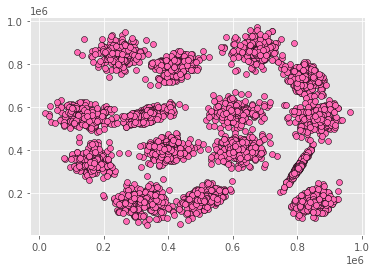

In [29]:
# download the file into a dataframes and convert it to a numpy array.
data_test2 = pd.read_csv("https://www.dropbox.com/s/wco3lxgn1f4a5k2/data_custering.csv?dl=1", header=None).to_numpy()

#plot the points into a scatter plot
plt.scatter(data_test2[:, 0], data_test2[:,1], edgecolors = "k", color ='hotpink', marker='o')

In [30]:
# Define arguments to use the kmeans fuctions
K = 15
niter = 500
tol = 0.00001

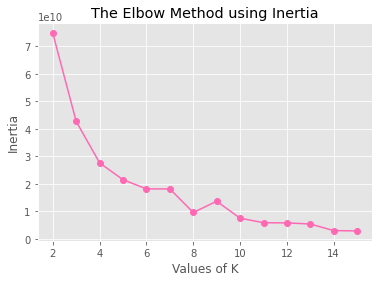

In [31]:
# Create 2 lists to store the values of the axis x and y
axis_X, axis_Y = [],[]

# Iterating K number of centroids, starting at the second one to consider at least 2 centroids.
for i in range(2,K+1):
    
    # Using the function kmeans and storing values of clusters and centroids on results variable.
    results = kmeans(data_test2,i,niter,tol)
    
    # Using the inertia function with the previous values calculated on results
    new = inertia(data_test2,results[0],results[1])
   
    # Append the values on the axis lists  
    axis_X.append(new[0])
    axis_Y.append(new[1])

#print(axis_Y)

# Plot the elbow graph using inertia
plt.plot(axis_X, axis_Y, marker = "o", c = "hotpink")
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

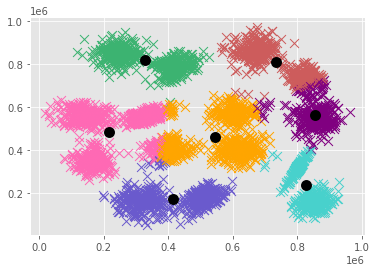

In [32]:
# Calculating the final results using kmeans fuction, with 7 clusters.
results_final = kmeans(data_test2,7,niter,tol)

style.use('ggplot')
colors = ["hotpink","mediumturquoise","purple","mediumseagreen","indianred","orange","slateblue"]

# Creating the final arguments to plot the graph of our final clusters
p = data_test2
centroids = results_final[1]
clusters = results_final[0]

# Plot the graph of final clusters
for i in range(len(clusters)):
    plt.scatter(p[i,0],p[i,1], marker="x", color=colors[clusters[i]], s=80, linewidths=1)

for centroid in centroids:
    plt.scatter(centroid[0],centroid[1], marker="o", color="k", s=80, linewidths=2)

plt.show()

**Conclusions:**
* By analysing the Elbow Method graphic and considerating the kmeans inputs chosen, we believe that the optimal number of clusters is 7. Observing this visualization, we can see that K = 7 is the point right before inertia starts decreasing in a approximately linear and constant form.
* After doing the next visualization, with K = 7, and comparing with the 1st graphic from this step, we consider that the chosen number of clusters is the most appropriate to our data. We made this decision also based on the exercise context, with the information that was provided.